# Домашнее задание 2

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 7 марта. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается на почту: __OptimizationHomework@yandex.ru__.

Тема письма для этого домашнего задания: __МФТИ_2__

Файл должен называться: __Фамилия_Имя__

Решение каждой задачи необходимо поместить после её условия.

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим задачу минимизации эмпирического риска (это краеугольная задача машинного обучения):
\begin{equation}
\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n l (g(w, x_i), y_i) + \frac{\lambda}{2} \| w\|^2_2.
\end{equation}

Будем рассматривать ленейную модель $g(w, x) = w^T x$ и логистическую/сигмоидную функцию потерь $l(z,y) = \ln (1 + \exp(-yz))$ (__Важно: $y$ должен принимать значения $-1$ или $1$__). Такую задачу еще называют логистической регрессией.

__(а)__ Выпишите градиент и гессиан функции. Является ли задача выпуклой? Сильно-выпуклой? Оцените $L$ и $\mu$ для данной функции. 

$$ f(w) = \frac{1}{n} \sum_{i=1}^n \ln(1 + \exp(-y_i \cdot w^{\top} x_i)) + \frac{\lambda}{2} w^\top w$$
$$ \nabla_w f(w) = \frac{1}{n} \sum_{i=1}^n \left( -y_i \cdot x_i \frac{\exp(-y_i w^T x_i)}{1 + \exp(-y_i w^T x_i)} \right) + \lambda w $$
$$ \nabla^2_w f(w) = \frac{1}{n} \sum_{i=1}^n \left( x_i x_i^T \frac{\exp(-y_i w^T x_i)}{(1 + \exp(-y_i w^T x_i))^2} \right) + \lambda I $$
В последнем воспользовались тем, что $y_i^2 = 1$.

Функция $\ln (1 + \exp(-yz))$ выпукла относительно переменной $z$, поэтому при подстановки вместо $z$ линейной функции выпуклость сохранится. Так же норма выпуклая функция. Сумма выпуклых -- выпуклая, поэтому **да, задача выпуклая.**

Гессиан состоит из суммы и диагональной матрицы. Обозначим сумму за $A(w)$. Логистическая функция выпуклая, отсюда $A(w) \succeq 0$. Т.е. $\nabla^2_w f(w) - \lambda I = A(w) \succeq 0$. Отсюда получаем что  $\nabla^2_w \succeq \lambda I$. Из того что $\lambda > 0$ получаем **$\mu$-сильную выпуклость с $\mu = \lambda$.**

Будем считать что $\forall i \hookrightarrow ||x_i||^2_2 \le M^2$. Аналогично предыдущему пункту нам достаточно оценить с.з. $A(w)$. Функция $\frac{\exp(\cdot)}{(1+\exp(\cdot))^2}$ ограничена сверху $1/4$. Тогда $||A(w)|| \le \frac{M^2}{4}$. Отсюда получаем оценку на макс с.з. и сразу же $L = M^2/4 + \lambda$.



__(б)__ К заданию приложен датасет _mushrooms_. С помощью следующего кода сформируйте матрицу $X$ и вектор $y$ ($X$ - матрицу из векторов $\{x_i\}$ и вектор $y$ - из $\{y_i\}$):

In [3]:
dataset = "mushrooms.txt" 
#файл должен лежать в той же деректории, что и notebook

In [4]:
from sklearn.datasets import load_svmlight_file
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
n, d = X.shape
y = 2*y-3
n, d

(8124, 112)

Разделите (лучше случайно) данные (а значит $X$ и $y$) на две части: обучающую и тестовую (примерно в отношении $4$ к $1$). Опишите, как это было сделано.

In [3]:
from sklearn.model_selection import train_test_split
# воспользуемся готовым решением 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

__(в)__ Для обучающей части $X_{train}$, $y_{train}$ оцените константу $L$ по формулам полученным выше. Реализуйте функцию подсчета градиента целевой функции. Решите задачу оптимизации/обучите модель машинного обучения с помощью градиентного спуска. Изобразите график сходимости. Какой критерий сходимости будет использовать? Сделайте вывод.

In [7]:
import numpy as np

lambda_value = 0.01
M = np.max(np.linalg.norm(X_train, axis=1)) 
L = M**2 / 4 + lambda_value

def loss_val(w, X, y, lambda_value):
    yXw = y * (X @ w)
    log_loss = np.mean(np.log(1 + np.exp(-yXw)))
    reg_loss = (lambda_value / 2) * np.dot(w, w)
    return log_loss + reg_loss

def loss_grad(w, X, y, lambda_value):
    yXw = y * (X @ w)
    log_grad = np.mean((-y * X.T)/(1+np.exp(+yXw)), axis=1)
    reg_grad = lambda_value * w
    return log_grad + reg_grad

def gradient_descent(X, y, lambda_value, step, num_iterations=100, tolerance=1e-6):
    w = np.zeros(X.shape[1])
    loss_history = []
    for i in range(num_iterations):
        gradient = loss_grad(w, X, y, lambda_value)
        w = w - gradient * step
        loss = loss_val(w, X, y, lambda_value)
        loss_history.append(loss)
        if i > 0 and np.abs(loss_history[-2] - loss_history[-1]) < tolerance:
            break
    return w, loss_history

num_iterations = 100
w_opt, loss_history = gradient_descent(X_train, y_train, lambda_value, 2/(L+lambda_value), num_iterations)


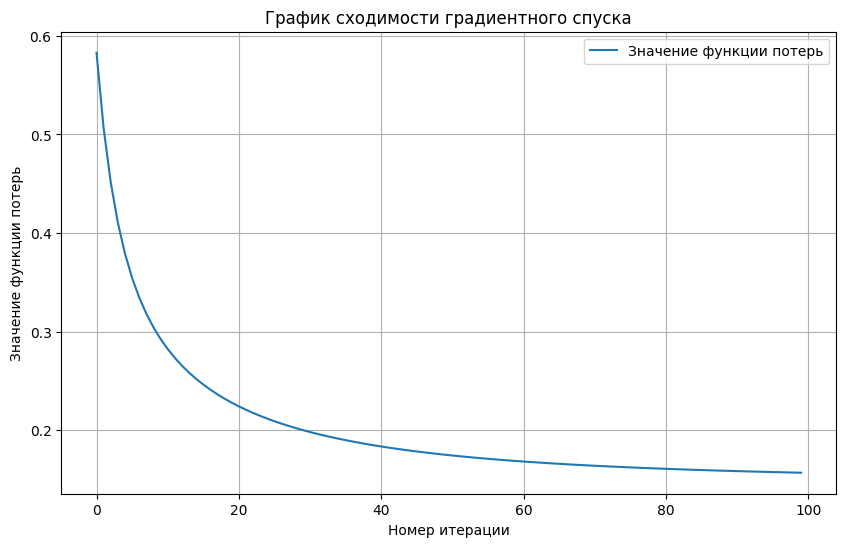

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(loss_history, label='Значение функции потерь')
plt.xlabel('Номер итерации')
plt.ylabel('Значение функции потерь')
plt.title('График сходимости градиентного спуска')
plt.legend()
plt.grid(True)
plt.show()

Мысли: поигрался со значением для регуляризации. Есть мысли что лучше считать критерий остановки по малости градиента. Заметил снова, что шаг $2/(L+\mu)$ показывает себя лучше (а именно, тот же результат за меньшее число итераций; или лучший результат при равном кол-ве итераций) при прочих равных.

Вывод: как минимум, точно можно сказать, что сходится к чему-то, а не расходится :)

__(г)__ Как использовать итоговую модель для предсказания? Ответив на вопрос, сделайте предсказания на тестовой выборке. Сравните с реальными метками. Количество правильно угаданных меток есть точность/accuracy вашей модели. Запустите еще раз процесс обучения из пункта в), постройте как меняется точность модели от номера итерации градиентного спуска (измеряйте не каждую итерацию, а, например, каждую 100 или 1000). Сделайте вывод. 

In [38]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
# я погуглил, нашел что надо примерно так, разобраться не успел -- разберусь после дедлайна
y_pred = np.where(sigmoid(X_test.dot(w_opt)) >= 0.5, 1, -1)
accuracy = np.mean(y_pred == y_test)
accuracy

0.9815384615384616

In [40]:
def compute_accuracy(X, y, w):
    y_pred = np.where(sigmoid(X.dot(w)) >= 0.5, 1, -1)
    return np.mean(y_pred == y)

def modified_gradient_descent(X_train, y_train, X_test, y_test, lambda_value, L, num_iterations=100, eval_interval=100):
    w = np.zeros(X_train.shape[1])
    train_accuracy_history = []
    test_accuracy_history = []
    for i in range(num_iterations):
        gradient = compute_gradient(w, X_train, y_train, lambda_value)
        w = w - gradient / L
        
        if i % eval_interval == 0 or i == num_iterations - 1:
            train_accuracy = compute_accuracy(X_train, y_train, w)
            test_accuracy = compute_accuracy(X_test, y_test, w)
            train_accuracy_history.append(train_accuracy)
            test_accuracy_history.append(test_accuracy)
    
    return w, train_accuracy_history, test_accuracy_history

w_opt, train_acc_history, test_acc_history = modified_gradient_descent(X_train, y_train, X_test, y_test, lambda_value, L, 10000, 100)

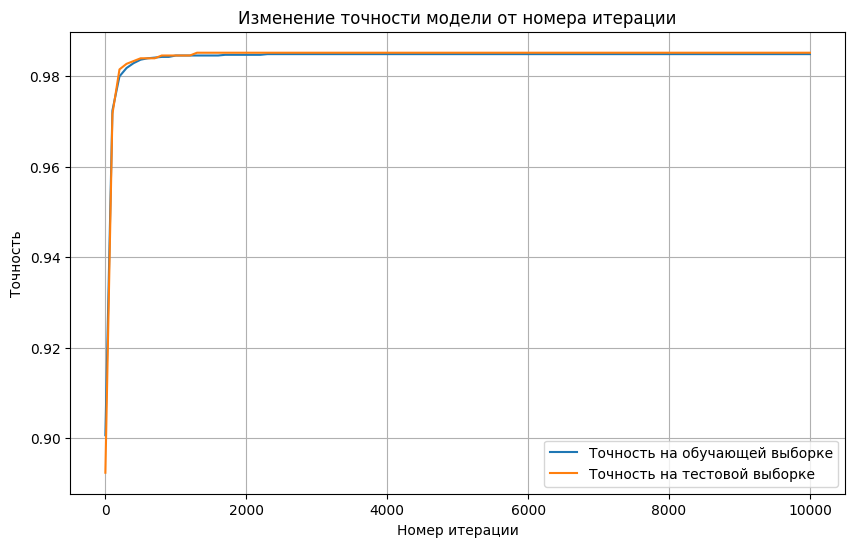

In [42]:
iterations = np.arange(0, 10001, 100)
plt.figure(figsize=(10, 6))
plt.plot(iterations, train_acc_history, label='Точность на обучающей выборке')
plt.plot(iterations, test_acc_history, label='Точность на тестовой выборке')
plt.xlabel('Номер итерации')
plt.ylabel('Точность')
plt.title('Изменение точности модели от номера итерации')
plt.legend()
plt.grid(True)
plt.show()

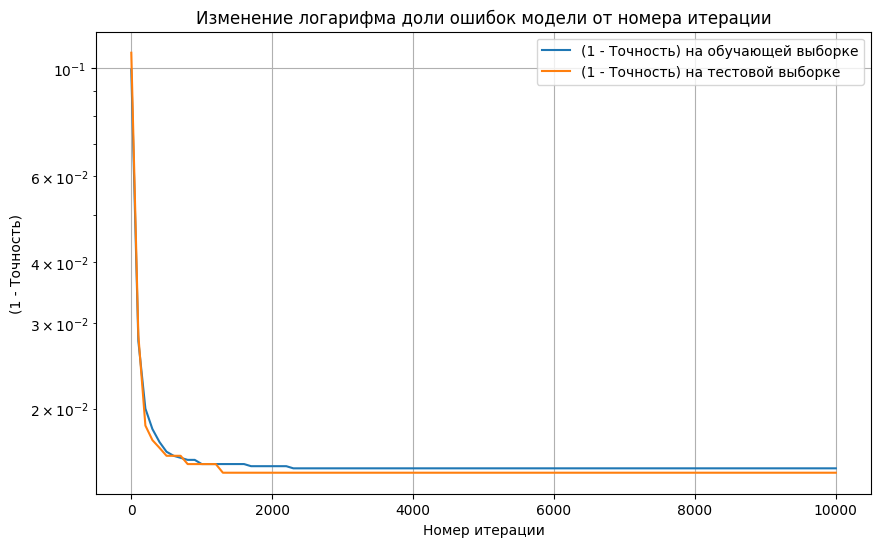

In [46]:
plt.figure(figsize=(10, 6))
plt.semilogy(iterations, 1 - np.array(train_acc_history), label='(1 - Точность) на обучающей выборке')
plt.semilogy(iterations, 1 - np.array(test_acc_history), label='(1 - Точность) на тестовой выборке')
plt.xlabel('Номер итерации')
plt.ylabel('(1 - Точность)')
plt.title('Изменение логарифма доли ошибок модели от номера итерации')
plt.legend()
plt.grid(True)
plt.show()

## Задача 2

__(a)__ Реализуйте метод тяжелого шарика. 

In [48]:
def heavy_ball_method(f_grad, x0, gamma, tau, K):
    x_prev = x0
    x = x0 
    for k in range(K):
        x, x_prev = x - gamma[k] * f_grad(x) + tau[k] * (x - x_prev), x
    return x


__(б)__ Решите задачу логистической регрессии с помощью метода тяжелого шарика. Зафиксируйте шаг $\frac{1}{L}$ и перебирайте разные значения моментума от -1 до 1. Постройте график сходимости метода от числа итераций для различных значений моментума. Всегда ли сходимость является монотонной?

In [61]:
def f_grad(w):
    return compute_gradient(w, X_train, y_train, lambda_value)

step_count = 1000
gamma = [1/L] * step_count 

# тут такой странный выбор точек потому что я строил для разных 
# и получается наиболее информативно так
tau_values = np.concatenate([np.linspace(-0.8, -0.2, 4), np.linspace(0, 0.95, 20)])

x0 = np.zeros(X_train.shape[1]) 

momentums = []
losses = []

for tau_value in tau_values:
    tau = [tau_value] * step_count
    x_final = heavy_ball_method(f_grad, x0, gamma, tau, step_count)
    final_loss = compute_loss(x_final, X_train, y_train, lambda_value)
    momentums.append(tau_value)
    losses.append(final_loss)


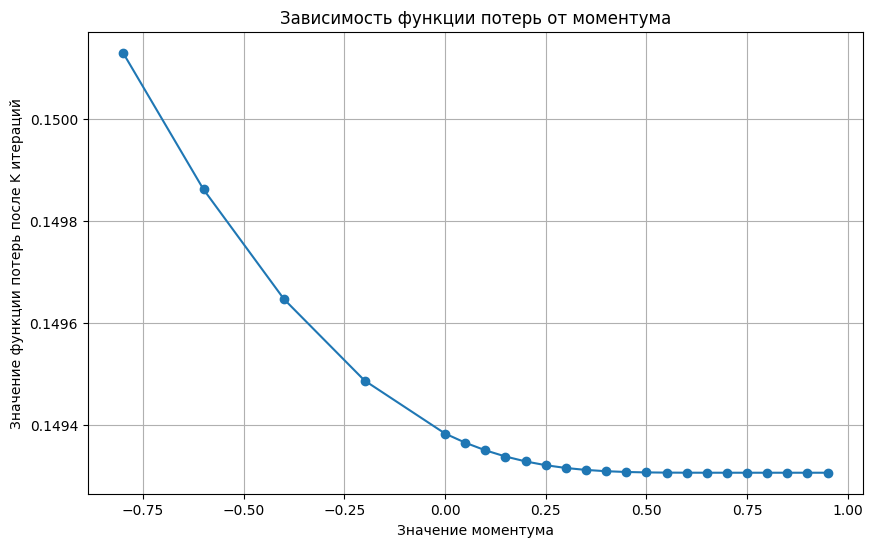

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(momentums, losses, marker='o', linestyle='-')
plt.xlabel('Значение моментума')
plt.ylabel('Значение функции потерь после K итераций')
plt.title('Зависимость функции потерь от моментума')
plt.grid(True)
plt.show()

В 1 резкий скачок (что логично), поэтому я убрал с графика что б лучше было видно что происходит в других местах. Поэтому оптимальное значение получается почти единица.

In [63]:
best_tau_value = 0.95

__(в)__ Для лучшего значения моментума постройте график зависимости точности модели на тестовой выборке от времени работы метода. Добавьте на этот же график сходимость градиентного спуска с шагом $\frac{1}{L}$. Сделайте вывод.

In [64]:
import time

def compute_accuracy(X, y, w):
    predicted_classes = np.where(sigmoid(X_test.dot(w_opt)) >= 0.5, 1, -1)
    return np.mean(predicted_classes == y)

def modified_heavy_ball_method(f_grad, x0, gamma, tau, K, X_test, y_test):
    x_prev = x0
    x = x0
    accuracies = []
    times = [0] 
    start_time = time.time()
    for k in range(K):
        current_time = time.time()
        times.append(current_time - start_time)
        accuracy = compute_accuracy(X_test, y_test, x)
        accuracies.append(accuracy)
        x, x_prev = x - gamma[k] * f_grad(x) + tau[k] * (x - x_prev), x
    return x, accuracies, times

def modified_gradient_descent(f_grad, x0, gamma, K, X_test, y_test):
    x = x0
    accuracies = []
    times = [0]
    start_time = time.time()
    for k in range(K):
        current_time = time.time()
        times.append(current_time - start_time)
        accuracy = compute_accuracy(X_test, y_test, x)
        accuracies.append(accuracy)
        x = x - gamma[k] * f_grad(x)
    return x, accuracies, times

best_tau = [best_tau_value] * step_count 

_, hb_accuracies, hb_times = modified_heavy_ball_method(f_grad, x0, [1/L] * step_count, best_tau, step_count, X_test, y_test)
_, gd_accuracies, gd_times = modified_gradient_descent(f_grad, x0, [1/L] * step_count, step_count, X_test, y_test)

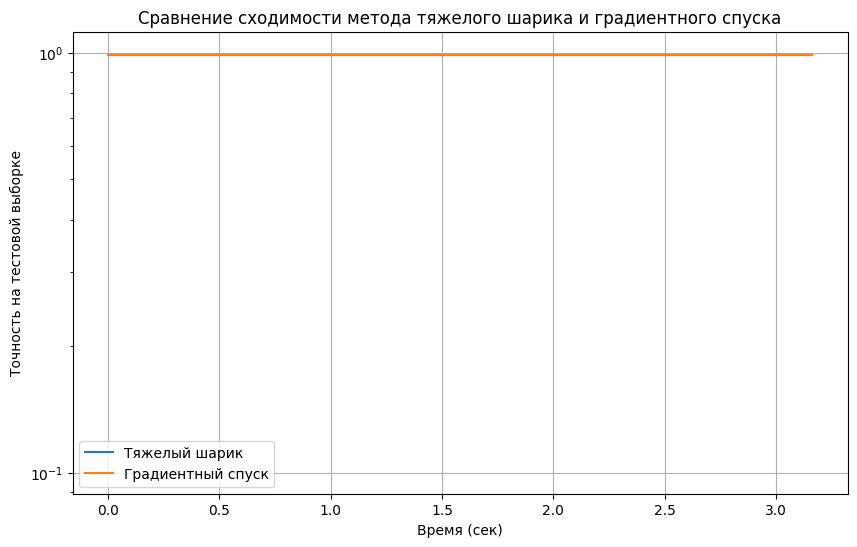

In [72]:
plt.figure(figsize=(10, 6))
plt.semilogy(hb_times[1:], hb_accuracies, label='Тяжелый шарик')
plt.semilogy(gd_times[1:], gd_accuracies, label='Градиентный спуск')
plt.xlabel('Время (сек)')
plt.ylabel('Точность на тестовой выборке')
plt.title('Сравнение сходимости метода тяжелого шарика и градиентного спуска')
plt.legend()
plt.grid(True)
plt.show()

кажется, синяя линия чуть выше. а так, практически совпадают. надо будет еще поиграться с масштабом

__(г)__ Реализуйте ускоренный метод Нестерова. 

In [97]:
def nesterov_accelerated_gradient(f_grad, compute_loss, x0, gamma, tau, K, X, y, lambda_value):
    x = x0  
    xt = x0  
    x_prev = x0 
    loss_history = []
    
    for k in range(K):
        grad = f_grad(xt)  
        x = xt - gamma[k] * grad  
        
        xt = x  + tau[k] * (x  - x_prev) if k > 0 else x 
        x_prev = x 
        
        loss_history.append(compute_loss(x , X, y, lambda_value))
    
    return x , loss_history


__(д)__ Решите задачу логистической регресии с помощью метода Нестерова. Зафиксируйте шаг $\frac{1}{L}$ и перебирайте разные значения моментума от -1 до 1. Проверьте также значения моментума равные $\frac{k}{k+3}$, $\frac{k}{k+2}$, $\frac{k}{k+1}$ ($k$ - номер итерации), а если решаете сильно выпуклую задачу, то и $\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$. Постройте график сходимости метода от числа итераций для различных значений моментума. Всегда ли сходимость является монотонной?

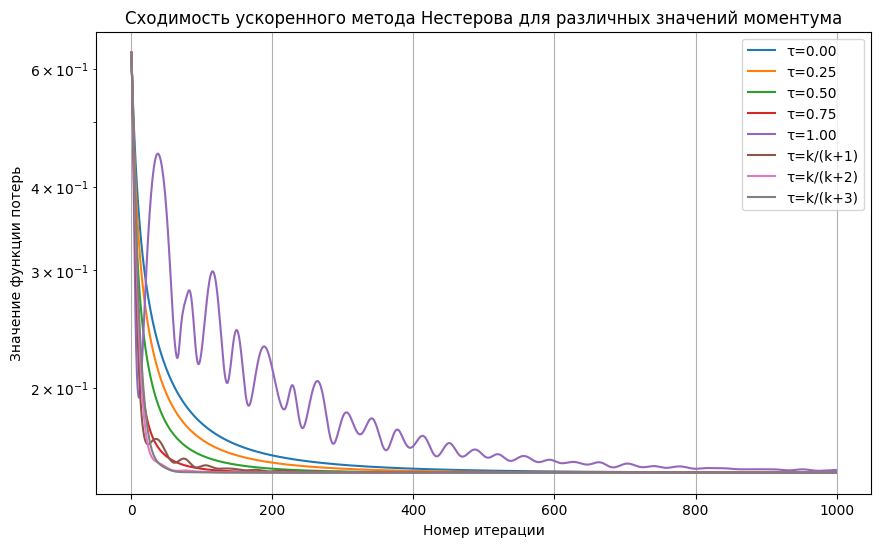

In [100]:
step_count = 1000
gamma = [1/L] * step_count 

x0 = np.zeros(X_train.shape[1])

tau_values = np.linspace(0, 1, 5) 
dynamic_tau_values = [[k / (k + j) for k in range(step_count)] for j in range(1, 4)] 


plt.figure(figsize=(10, 6))

for tau_value in tau_values:
    tau = [tau_value] * step_count
    _, loss_values = nesterov_accelerated_gradient(f_grad, compute_loss, x0, gamma, tau, step_count, X_train, y_train, lambda_value)
    plt.semilogy(loss_values, label=f"τ={tau_value:.2f}")

for i, dynamic_tau in enumerate(dynamic_tau_values):
    _, loss_values = nesterov_accelerated_gradient(f_grad, compute_loss, x0, gamma, dynamic_tau, step_count, X_train, y_train, lambda_value)
    plt.semilogy(loss_values, label=f"τ=k/(k+{i+1})")

plt.xlabel('Номер итерации')
plt.ylabel('Значение функции потерь')
plt.title('Сходимость ускоренного метода Нестерова для различных значений моментума')
plt.legend()
plt.grid(True)
plt.show()


не всегда монотонно. оптимально будет видимо $k/(k+3)$.

In [101]:
best_tau_nesterov = [k/(k+3) for k in range(1, step_count+1)]

__(е)__ Для лучшего значения моментума постройте график зависимости точности модели на тестовой выборке от времени работы метода. Добавьте этот график к графикам для тяжелого шарика и градиентного спуска из пункта (д). Сделайте итоговый вывод.

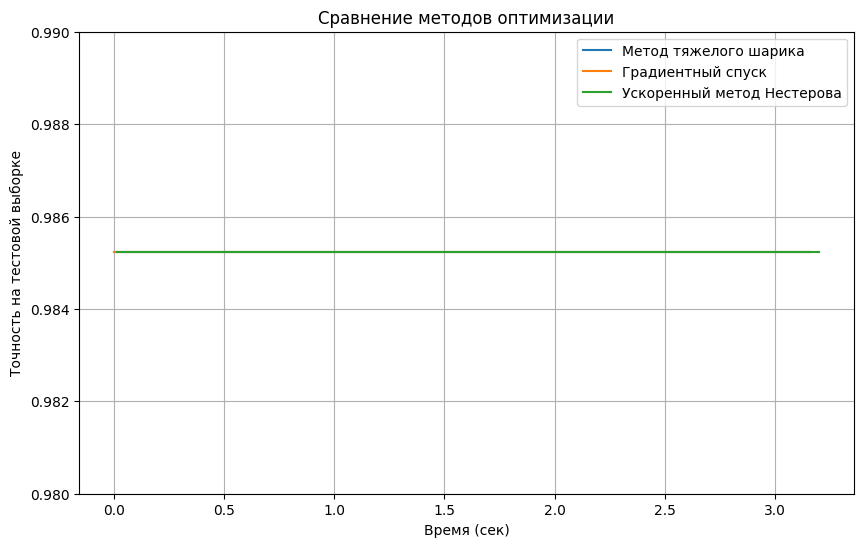

In [107]:
import time

def nesterov_with_accuracy_and_timing(f_grad, compute_accuracy, x0, gamma, tau, K, X_train, y_train, X_test, y_test, lambda_value):
    x = x0
    y = x0
    x_prev = x0
    accuracies = []
    times = []
    start_time = time.time()
    
    for k in range(K):
        grad = f_grad(y)
        x_new = y - gamma[k] * grad
        y = x_new + tau[k] * (x_new - x_prev) if k > 0 else x_new
        x_prev = x_new
        
        current_time = time.time()
        times.append(current_time - start_time)
        accuracies.append(compute_accuracy(X_test, y_test, x_new))
    
    return x_new, accuracies, times

best_tau_nesterov

_, nesterov_accuracies, nesterov_times = nesterov_with_accuracy_and_timing(
    f_grad, compute_accuracy, x0, [1/L] * step_count, best_tau_nesterov, step_count, X_train, y_train, X_test, y_test, lambda_value)

plt.figure(figsize=(10, 6))
plt.plot(hb_times[1:], hb_accuracies, label='Метод тяжелого шарика')
plt.plot(gd_times[1:], gd_accuracies, label='Градиентный спуск')
plt.plot(nesterov_times, nesterov_accuracies, label='Ускоренный метод Нестерова')
plt.xlabel('Время (сек)')
plt.ylabel('Точность на тестовой выборке')
plt.title('Сравнение методов оптимизации')
plt.ylim(0.98, 0.99) 
plt.legend()
plt.grid(True)
plt.show()



Видно, что ускоренный работает быстрее. Хотя с графиком что-то не так, но я не могу понять что.

__Бонусные пункт__

__(ж)__ Сделаем подбор константы $L$ адаптивным. Как упоминалось на семинаре, можно измерять локальную $L$, используя:
$$
f(y) \leq f(x^k) + \langle \nabla f(x^k), y - x^k \rangle + \frac{L}{2}\|x^k - y\|_2^2
$$
В частности, может подойти процедура:

```python
def backtracking_L(f, grad, x, h, L0, rho):
    L = L0
    fx = f(x)
    gradx = grad(x)
    while True:
        y = x - 1 / L * h
        if f(y) <= fx - 1 / L gradx.dot(h) + 1 / (2 * L) h.dot(h):
            break
        else:
            L = L * rho
    return L
```

Каким стоит взять __h__? __rho__ должно быть больше или меньше 1? __L0__ надо брать заведомо большим или маленьким?

In [ ]:
#ответ

__(з)__ Поэксперементируйте с этой процедурой, встроенной в подбор $L$ для шага градиентного спуска. В качестве задачи продолжайте рассматривать логистическую регрессию из Задачи 1. Аналогично встройте процедуру подбора $L$ в метод тяжелого шарика и ускоренный метод Нестерова. Постройте график сходимости метода от числа итераций (критерий сходимости подберите самостоятельно). Отобразите на этом графике градиентный спуск, тяжелый шарик и метод Нестерова с адаптивным шагом и шагом $\frac{1}{L}$ (всего 6 линий на графике). Сделайте вывод.

In [ ]:
#ответ

__(и)__ Постройте аналогичный пункту (з) график точности модели от времени.

In [ ]:
#ответ

__(к)__ В [работе](https://arxiv.org/pdf/1204.3982.pdf) представлена техника рестартов для подавления немонотонной сходимости Алгоритма 2 (метод Нестерова). Попробуйте повторить эксперименты авторов на $\ell_2$-регуляризованной квадратичной или логистической регресии. Возьмите параметр регуляризации $\lambda = L / 100$.

In [ ]:
#ответ